# Urban Heat Island Analysis

### 1. Business Understanding



**Objective:**
- Analyze the impact of urban heat islands (UHI) on local climate and propose mitigation strategies.

**Goals:**
- Identify and map urban heat islands in various cities.
- Analyze temperature variations between urban and rural areas.
- Correlate UHI data with socio-economic factors.
- Propose actionable mitigation strategies.

**Key Questions:**
- What are the temperature differences between urban and rural areas?
- How do socio-economic factors correlate with the intensity of UHIs?
- What mitigation strategies can reduce the impact of UHIs?

**Project Plan:**
- Define project timeline and milestones.
- Identify key stakeholders (e.g., city planners, environmental agencies).



### 2. Data Understanding



**Data Sources:**
- NASA's MODIS Land Surface Temperature (LST) data.
- Socio-economic data from public sources (e.g., census data).
- Geographic data for urban and rural delineations.

**Data Collection:**
- Download MODIS LST data for selected cities.
- Collect socio-economic data from government databases.
- Obtain geographic boundaries from GIS data sources.

**Initial Data Exploration:**
- Visualize temperature data to identify initial patterns.
- Summarize socio-economic data (e.g., income levels, population density).

**Assess Data Quality:**
- Check for missing values, inconsistencies, and data accuracy.


### MODIS LST Data
- MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061
    - [Link](https://search.earthdata.nasa.gov/search/granules?p=C2269056084-LPCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=MOD11A2&tl=1719332295.973!3!!)




Example Workflow with SW and NE Coordinates

Region Example: Houston, TX, and Surrounding Areas

1.	Define the Bounding Box for the Large Region
    - SW Coordinate: Latitude 29.0° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -94.0° W
2.	Urban Area Bounding Box (Example)
    -  SW Coordinate: Latitude 29.5° N, Longitude -95.5° W
    - NE Coordinate: Latitude 30.0° N, Longitude -95.0° W
3.	Rural Area Bounding Box (Example)
    - SW Coordinate: Latitude 30.5° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -96.0° W

![png](images/MODIS-LST-Houston-coordinates.png)

![png](images/MODIS-LST-houston-info.png)

- Data files are saved as URLs in the MODIS-LST/..-download.txt file
    - https://search.earthdata.nasa.gov/downloads/2746449253

### CHanging MODIS Tactics: Download Urban/Rural Separately

For Houston, TX:

- Urban Region Bounding Box:
```
•	Southwest (SW) Coordinate: Latitude 29.5° N, Longitude -95.5° W
•	Northeast (NE) Coordinate: Latitude 30.0° N, Longitude -95.0° W
•	Rural Region Bounding Box:
•	Southwest (SW) Coordinate: Latitude 30.5° N, Longitude -96.5° W
•	Northeast (NE) Coordinate: Latitude 31.0° N, Longitude -96.0° W
``` 

- Urban: 
    - Coordinates:
        - SW: 29.5,-95.5
        - NE: 30.0,-95.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59
    - File List: 
        - https://search.earthdata.nasa.gov/downloads/2678427443
        - "data/MODIS-LST/urban-2678427443-download.txt"
        
- Rural:
    - Coordinates: 
        - SW: 30.5, -96.5
        - NE: 31.0, -96.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59


In [49]:
urban_file  = "data/MODIS-LST/urban-2678427443-download.txt"
rural_file = "data/MODIS-LST/rural-6423272442-download.txt"

In [50]:
import requests
import json, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 300)

In [51]:
# Original single large starting region version
# fileurls_fpath = 'data/MODIS-LST/2746449253-download.txt'


In [52]:
# Load rural files as a dataframe
files_rural = pd.read_csv(rural_file, header=None)
files_rural.columns = ['url']
files_rural['group'] = 'rural'
files_rural

,url,group
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural
5,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v05.061.2023215145934/MOD11A2.A2023201.h09v05.061.2023215145934.hdf,rural
6,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v05.061.2023214104254/MOD11A2.A2023193.h09v05.061.2023214104254.hdf,rural
7,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v05.061.2023201061553/MOD11A2.A2023185.h09v05.061.2023201061553.hdf,rural
8,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v05.061.2023191223728/MOD11A2.A2023177.h09v05.061.2023191223728.hdf,rural
9,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v05.061.2023178033518/MOD11A2.A2023169.h09v05.061.2023178033518.hdf,rural


In [53]:
# Load rural files as a dataframe
files_urban = pd.read_csv(urban_file, header=None)
files_urban.columns = ['url']
files_urban['group'] = 'urban'
files_urban

,url,group
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v06.061.2023251215934/MOD11A2.A2023241.h09v06.061.2023251215934.hdf,urban
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v06.061.2023242040015/MOD11A2.A2023233.h09v06.061.2023242040015.hdf,urban
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v06.061.2023235042835/MOD11A2.A2023225.h09v06.061.2023235042835.hdf,urban
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v06.061.2023226040517/MOD11A2.A2023217.h09v06.061.2023226040517.hdf,urban
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v06.061.2023220022032/MOD11A2.A2023209.h09v06.061.2023220022032.hdf,urban
5,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v06.061.2023215145515/MOD11A2.A2023201.h09v06.061.2023215145515.hdf,urban
6,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v06.061.2023214104850/MOD11A2.A2023193.h09v06.061.2023214104850.hdf,urban
7,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v06.061.2023201095900/MOD11A2.A2023185.h09v06.061.2023201095900.hdf,urban
8,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v06.061.2023191223224/MOD11A2.A2023177.h09v06.061.2023191223224.hdf,urban
9,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v06.061.2023178032028/MOD11A2.A2023169.h09v06.061.2023178032028.hdf,urban


In [54]:
files = pd.concat([files_rural, files_urban]).reset_index(drop=True)
files

,url,group
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural
5,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v05.061.2023215145934/MOD11A2.A2023201.h09v05.061.2023215145934.hdf,rural
6,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v05.061.2023214104254/MOD11A2.A2023193.h09v05.061.2023214104254.hdf,rural
7,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v05.061.2023201061553/MOD11A2.A2023185.h09v05.061.2023201061553.hdf,rural
8,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v05.061.2023191223728/MOD11A2.A2023177.h09v05.061.2023191223728.hdf,rural
9,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v05.061.2023178033518/MOD11A2.A2023169.h09v05.061.2023178033518.hdf,rural


In [55]:
# Save a test url
url = files.loc[0,'url']
url

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [56]:
# Get just the filename
filename = os.path.basename(url)
filename

'MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

Decode the filename `MOD11A2.A2023145.h09v06.061.2023154043201.hdf` to understand the different components it represents.
#
### Breakdown of the Filename

- **MOD11A2**: This indicates the data product.
  - **MOD**: Refers to MODIS (Moderate Resolution Imaging Spectroradiometer).
  - **11A2**: Indicates the specific product, which in this case is the 8-day Land Surface Temperature (LST) product.

- **A2023145**: This represents the date of the data acquisition.
  - **A**: Indicates that the following digits represent a date in the format YYYYDDD.
  - **2023**: The year of the data, which is 2023.
  - **145**: The Julian day of the year, which is the 145th day of 2023.
    - To convert the Julian day to a calendar date: January 1st is day 1, so May 25th is the 145th day of the year 2023.

- **h09v06**: This represents the horizontal and vertical tile identifiers in the MODIS grid.
  - **h09**: The horizontal tile number.
  - **v06**: The vertical tile number.
  - Together, these indicate the specific spatial location on the Earth in the MODIS sinusoidal grid.

- **061**: This indicates the collection version of the data product.
  - **061**: Version 6.1 of the MOD11A2 product.

- **2023154043201**: This represents the production timestamp, indicating when the file was generated.
  - **2023**: The year of production, which is 2023.
  - **154**: The Julian day of production, which is the 154th day of the year (June 3rd, 2023).
  - **043201**: The time of production in HHMMSS format (04:32:01 UTC).

- **.hdf**: This indicates the file format.
  - **.hdf**: Hierarchical Data Format (HDF), which is a file format used for storing scientific data.

#### Summary

- **Product**: MODIS 8-day Land Surface Temperature (MOD11A2)
- **Acquisition Date**: May 25, 2023 (145th day of 2023)
- **Spatial Location**: Tile h09v06 in the MODIS grid
- **Version**: Collection 6.1
- **Production Timestamp**: June 3, 2023, at 04:32:01 UTC
- **File Format**: HDF


In [57]:
# Save the date
date = filename.split('.')[1]
date

'A2023241'

In [58]:
import re
import datetime as dt
pattern = r'\.A(\d{4})(\d{3})'
match = re.search(pattern, filename)#.groups()

In [59]:
if match:
    year = match.group(1)  # Captured year
    julian_day = match.group(2)  # Captured Julian day
    
    # Convert Julian day to a standard date
    date_of_collection = dt.datetime.strptime(f'{year} {julian_day}', '%Y %j').strftime('%Y-%m-%d')
    
    print(f'Date of Data Collection: {date_of_collection}')
else:
    print('No match found')

Date of Data Collection: 2023-08-29


In [60]:
def extract_filedate(filename, pattern=r'\.A(\d{4})(\d{3})'):
    import re
    import datetime as dt
    match = re.search(pattern, filename)
    if match:
        year = match.group(1)  # Captured year
        julian_day = match.group(2)  # Captured Julian day

        # Convert Julian day to a standard date
        date_of_collection = dt.datetime.strptime(f'{year} {julian_day}', '%Y %j').strftime('%Y-%m-%d')
        return date_of_collection
    else:
        return None
    
extract_filedate(filename)

'2023-08-29'

In [61]:
# Save the filenames to new column
files['filename'] = files['url'].apply(lambda x: os.path.basename(x))

files['date'] = files['filename'].apply(extract_filedate)
files.head()

,url,group,filename,date
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural,MOD11A2.A2023241.h09v05.061.2023251220940.hdf,2023-08-29
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural,MOD11A2.A2023233.h09v05.061.2023242040454.hdf,2023-08-21
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural,MOD11A2.A2023225.h09v05.061.2023235043337.hdf,2023-08-13
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural,MOD11A2.A2023217.h09v05.061.2023226041049.hdf,2023-08-05
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural,MOD11A2.A2023209.h09v05.061.2023220022857.hdf,2023-07-28


In [62]:
# Save fpaths for input and output
files['fpath_out'] = files[['filename','group']].apply(lambda x: f"data/MODIS-LST/{x['group']}/{x['filename']}",
                                                       axis=1)
files.head()

,url,group,filename,date,fpath_out
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural,MOD11A2.A2023241.h09v05.061.2023251220940.hdf,2023-08-29,data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural,MOD11A2.A2023233.h09v05.061.2023242040454.hdf,2023-08-21,data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural,MOD11A2.A2023225.h09v05.061.2023235043337.hdf,2023-08-13,data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural,MOD11A2.A2023217.h09v05.061.2023226041049.hdf,2023-08-05,data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural,MOD11A2.A2023209.h09v05.061.2023220022857.hdf,2023-07-28,data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf


In [63]:
## Loop to download files
for i,row in files.iterrows():#enumerate(files['url']):
    
    # fpath_out = f'data/MODIS-LST/{os.path.basename(url)}'
    
    # Slice the fpath and url from the row
    fpath_out = row['fpath_out']
    url  = row['url']
    
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(fpath_out), exist_ok=True)
    
    print(f'- Downloading url ({i+1}/{len(files)}): {fpath_out}')
    
    # Skip if file already exists
    if os.path.exists(fpath_out):
        print(f'  - File already exists: {fpath_out}')
        
    # Download the file
    else:
        response = requests.get(url)
        with open(fpath_out, 'wb') as f:
            f.write(response.content)
        # print(url)


- Downloading url (1/26): data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
- Downloading url (2/26): data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
- Downloading url (3/26): data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
- Downloading url (4/26): data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
- Downloading url (5/26): data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf
  - File already exists: data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf
- Downloading url (6/26): data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.

In [64]:
files.to_csv('data/MODIS-LST/files.csv', index=False)
files.head()

,url,group,filename,date,fpath_out
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural,MOD11A2.A2023241.h09v05.061.2023251220940.hdf,2023-08-29,data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural,MOD11A2.A2023233.h09v05.061.2023242040454.hdf,2023-08-21,data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural,MOD11A2.A2023225.h09v05.061.2023235043337.hdf,2023-08-13,data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural,MOD11A2.A2023217.h09v05.061.2023226041049.hdf,2023-08-05,data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural,MOD11A2.A2023209.h09v05.061.2023220022857.hdf,2023-07-28,data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf


### Processing Data

In [65]:
%conda install -c conda-forge xarray dask netCDF4 bottleneck
!pip install h5py

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [66]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import box

In [67]:
files = pd.read_csv('data/MODIS-LST/files.csv')
files.head()

,url,group,filename,date,fpath_out
0,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf,rural,MOD11A2.A2023241.h09v05.061.2023251220940.hdf,2023-08-29,data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf
1,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.hdf,rural,MOD11A2.A2023233.h09v05.061.2023242040454.hdf,2023-08-21,data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf
2,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023225.h09v05.061.2023235043337/MOD11A2.A2023225.h09v05.061.2023235043337.hdf,rural,MOD11A2.A2023225.h09v05.061.2023235043337.hdf,2023-08-13,data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf
3,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023217.h09v05.061.2023226041049/MOD11A2.A2023217.h09v05.061.2023226041049.hdf,rural,MOD11A2.A2023217.h09v05.061.2023226041049.hdf,2023-08-05,data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf
4,https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v05.061.2023220022857/MOD11A2.A2023209.h09v05.061.2023220022857.hdf,rural,MOD11A2.A2023209.h09v05.061.2023220022857.hdf,2023-07-28,data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf


### Split this Section into 2: Rural vs Urban

In [68]:
# import glob
# file_list = glob.glob('data/MODIS-LST/*.hdf')
file_list_dict = files.groupby('group')['fpath_out'].apply(list).to_dict()
file_list_dict

{'rural': ['data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'],
 'urban': ['data/MODIS-LST/urban/MOD11A2.A2023241.h09v

In [69]:
# Define the path to the HDF5 file
fpath = file_list_dict['rural'][0]
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [70]:
# Load in example dataset
dataset = xr.open_dataset(fpath, engine='netcdf4')
# [i for i in dir(dataset) if not i.startswith('_')]

In [71]:
# Examine the data_vars
dataset.data_vars

Data variables:
    LST_Day_1km       (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_angl   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_31           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_32           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) flo

In [72]:
# dataset.coords

In [73]:
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [74]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [75]:
file_list_dict

{'rural': ['data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  'data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'],
 'urban': ['data/MODIS-LST/urban/MOD11A2.A2023241.h09v

In [76]:
fpath = file_list_dict['rural'][0]
fpath

'data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'

In [77]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [78]:
USE_DICT= False


if USE_DICT:
    # Loop to load all files
    dataset_dict = {'urban':[],
                    'rural':[]}
else:
    dataset_list = []

for group, file_list in file_list_dict.items():
    for fpath in file_list:
        # Open the HDF5 file
    
        dataset = xr.open_dataset(fpath, engine='netcdf4')
    
        # Save the group as an attribute
        dataset = dataset.expand_dims(group=[group])
        # dataset.attrs['group'] = group
        
        if USE_DICT:
            dataset_dict[group].append(dataset)
        else:
            dataset_list.append(dataset)
        

if USE_DICT:
    print(f'- Using dictionary')
    # Combine all the datasets into a single dataset
    ds_rural = xr.concat(dataset_dict['rural'], dim='time')
    ds_urban = xr.concat(dataset_dict['urban'], dim='time')
    
    ds = xr.concat([ds_rural, ds_urban], dim='time')

else:
    print(f'- Using list')
    ds = xr.concat(dataset_list, dim='time')

print(ds)

- Using list
<xarray.Dataset> Size: 6GB
Dimensions:           (time: 26, group: 2, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 16B 'rural' 'urban'
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables:
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 300MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    QC_Night          (time, group, Y

In [79]:
plot_vals = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
plot_vals

array([317.21538462, 317.21076923, 317.26307692, ...,          nan,
                nan,          nan])

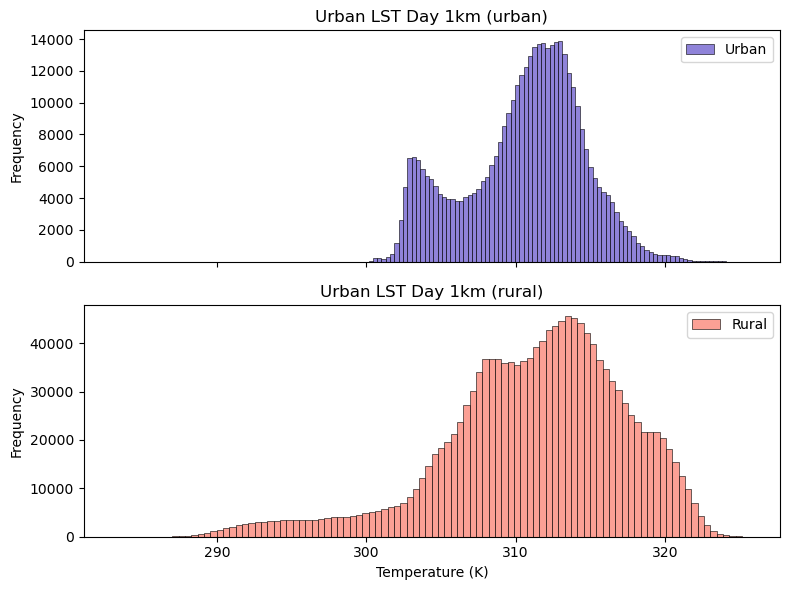

In [80]:
# Plot the distribution of the LST values
fig, axes=  plt.subplots(nrows=2, figsize=(8,6), sharex=True)


group = 'urban'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100,  ax=axes[0],label=group.title(), color='slateblue')
axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

group = 'rural'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100, ax=axes[1],label=group.title(), color='salmon')
axes[1].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
[ax.legend() for ax in axes]
fig.tight_layout()

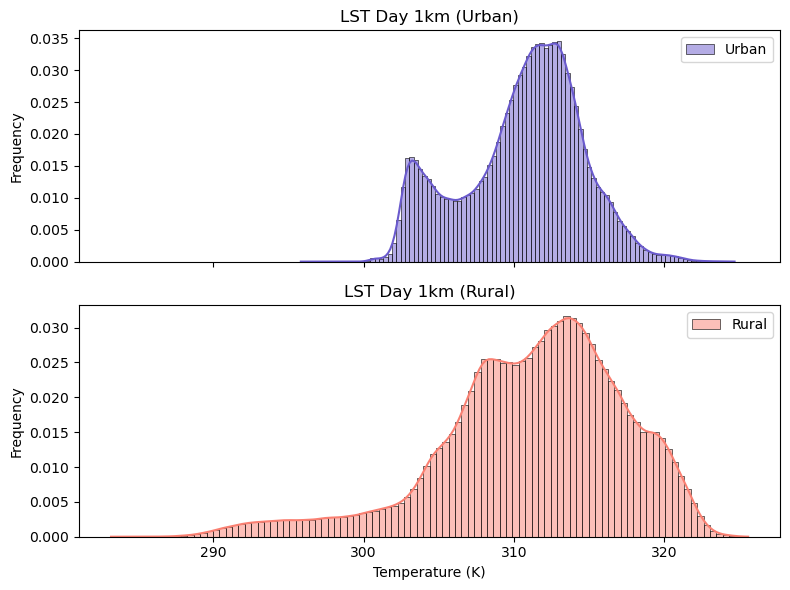

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr

def plot_lst_distribution(ds, var_name='LST_Day_1km', combined=False, bins=100, kde=True, stat='probability', unit="K"):
    """
    Plots the distribution of Land Surface Temperature (LST) values for urban and rural areas.

    Parameters:
    ds (xarray.Dataset): The dataset containing the LST data.
    var_name (str): The name of the LST variable in the dataset. Default is 'LST_Day_1km'.
    combined (bool): If True, plots both distributions on a single plot. If False, creates separate subplots. Default is False.
    bins (int): Number of bins for the histogram. Default is 100.
    kde (bool): Whether to plot a kernel density estimate. Default is True.
    stat (str): Statistic used to compute the histogram ('count', 'frequency', 'density', or 'probability'). Default is 'probability'.

    Returns:
    None
    """
    
        # Determine the label for the temperature unit
    if unit == 'K':
        temp_label = 'Temperature (K)'
    elif unit == 'C':
        temp_label = 'Temperature (°C)'
    elif unit == 'F':
        temp_label = 'Temperature (°F)'
    else:
        raise ValueError("Unit must be 'K', 'C', or 'F'")



    if combined:
        fig, ax = plt.subplots(nrows=1, figsize=(8, 4), sharex=True)
        axes = [ax]
    else:
        fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

    # Plot params
    groups = ['urban', 'rural']
    colors = ['slateblue', 'salmon']
    shared_kws = {'bins': bins, 'kde': kde, 'stat': stat}

    for i, group in enumerate(groups):
        # Slice the correct group
        plot_vals = ds.sel(group=group)[var_name].mean(dim='time').values.flatten()
        plot_vals = plot_vals[~np.isnan(plot_vals)]
        i_ax = 0 if combined else i
        
        sns.histplot(plot_vals, ax=axes[i_ax], label=group.title(), color=colors[i], **shared_kws)
        axes[i_ax].set(title=f'LST Day 1km ({group.title()})', ylabel='Frequency')
        
        # if group == 'rural':
        
    axes[-1].set(xlabel=temp_label)  # Adjust the unit if needed

    [ax.legend() for ax in axes]
    fig.tight_layout()
    plt.show()
    
    return fig, axes

# Example usage
# Assuming 'combined_ds' is your combined xarray dataset with urban and rural groups
plot_lst_distribution(ds, combined=False, unit='K');  # Separate subplots
# plot_lst_distribution(combined_ds, combined=True)   # Combined plot

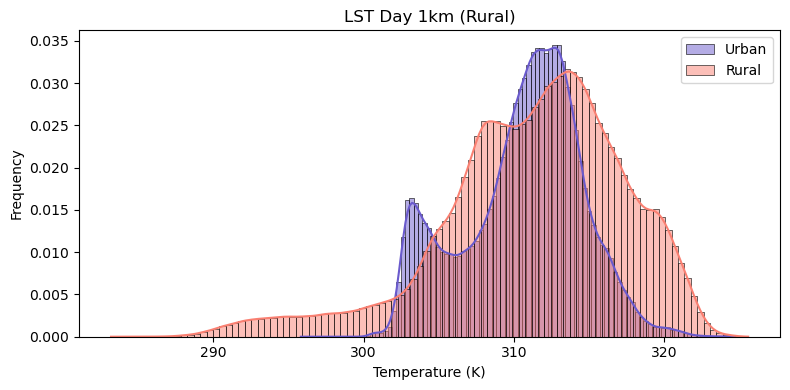

In [82]:
# # Plot the distribution of the LST values
# fig, ax=  plt.subplots(nrows=1, figsize=(8,4), sharex=True)
# axes = [ax]

# shared_kws = {'bins':100, 'kde':True, 'stat':'probability'}
# group = 'urban'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)],  ax=axes[0],label=group.title(), color='slateblue', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

# group = 'rural'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)], ax=axes[0],label=group.title(), color='salmon', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
# [ax.legend() for ax in axes]
# fig.tight_layout()


fig, axes = plot_lst_distribution(ds, combined=True, unit="K")  # Separate subplots



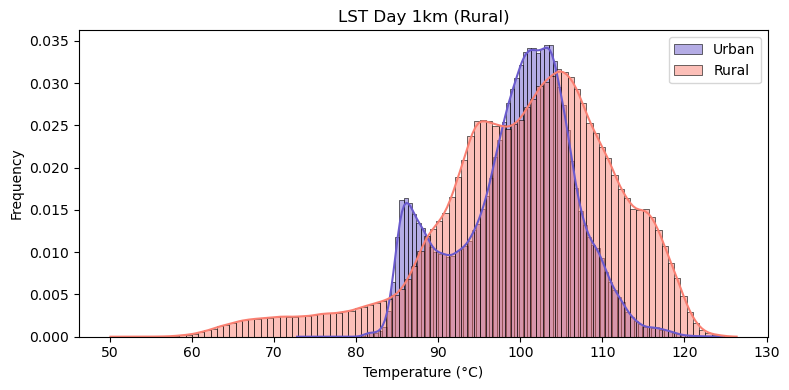

(<Figure size 800x400 with 1 Axes>,
 [<Axes: title={'center': 'LST Day 1km (Rural)'}, xlabel='Temperature (°C)', ylabel='Frequency'>])

In [83]:
## Convert temperature to Fahrenheit
# Convert LST temps from Kelvin to Fahrenheit
ds['LST_Day_1km'] = (ds['LST_Day_1km'] - 273.15)* 9/5 + 32


plot_lst_distribution(ds, combined=True, unit='C')  # Separate subplots


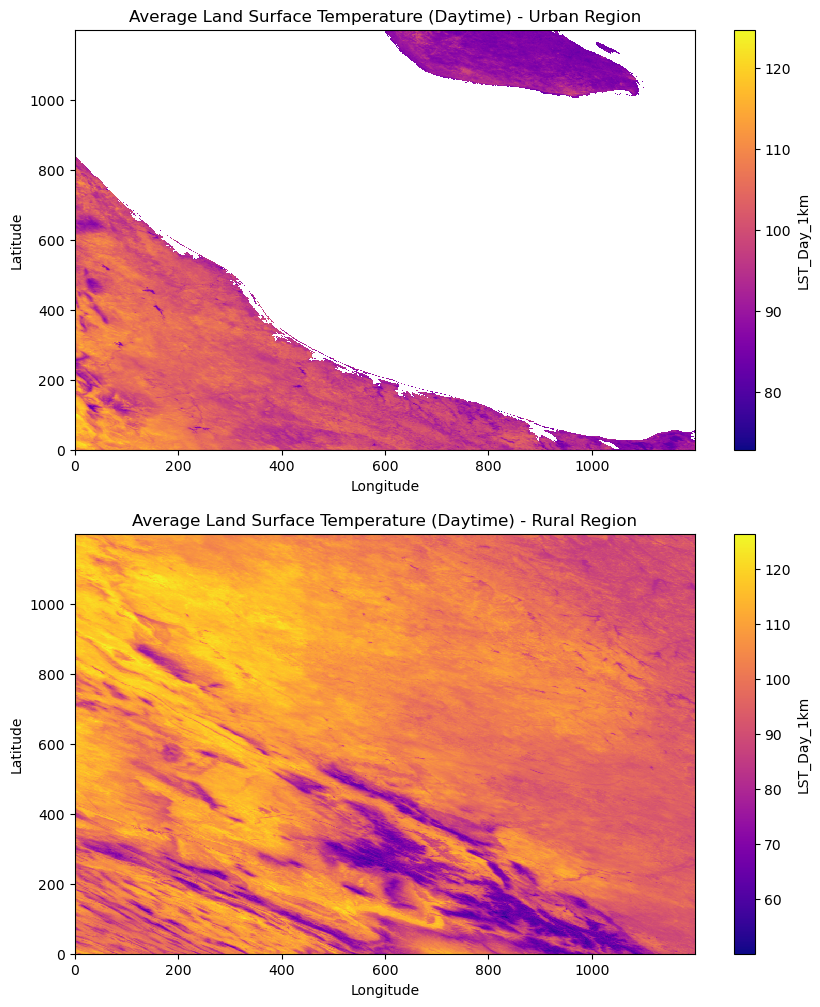

In [84]:
import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(10, 12), nrows=2)
cmap = 'plasma'
ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').plot(cmap=cmap, ax=axes[0])
axes[0].set(title='Average Land Surface Temperature (Daytime) - Urban Region',
            xlabel='Longitude',ylabel='Latitude')

# plt.figure(figsize=(10, 6))
ds.sel(group='rural')['LST_Day_1km'].mean(dim='time').plot(cmap=cmap, ax=axes[1])
axes[1].set(title='Average Land Surface Temperature (Daytime) - Rural Region',
            xlabel='Longitude',ylabel='Latitude');


In [85]:
# # Display the dataset's structure
# # print(f"{ds=}")

# # Display the variables and dimensions in the dataset
# print(f"{ds.variables=}")

# # Display the dimensions of the dataset
# print(f"{ds.dims=}")

# # Display the coordinates of the dataset
# print(f'{ds.coords=}')

### Interpreting Data Variables in the MODIS LST Dataset



The dataset you have contains several variables. Here's a detailed interpretation of each:

#### Dimensions
- **time**: The temporal dimension, representing different time points (26 time steps in this dataset).
- **YDim:MODIS_Grid_8Day_1km_LST**: The vertical spatial dimension (1200 grid cells).
- **XDim:MODIS_Grid_8Day_1km_LST**: The horizontal spatial dimension (1200 grid cells).

#### Data Variables

1. **LST_Day_1km**:
   - **Description**: Land Surface Temperature during the day.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the daytime land surface temperature for each grid cell over the specified time period.

2. **QC_Day**:
   - **Description**: Quality Control for daytime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the daytime LST data, indicating the reliability and accuracy of the measurements.

3. **Day_view_time**:
   - **Description**: Local time of day (in hours) at which the daytime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

4. **Day_view_angl**:
   - **Description**: View zenith angle for daytime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the daytime LST measurement.

5. **LST_Night_1km**:
   - **Description**: Land Surface Temperature during the night.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the nighttime land surface temperature for each grid cell over the specified time period.

6. **QC_Night**:
   - **Description**: Quality Control for nighttime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the nighttime LST data, indicating the reliability and accuracy of the measurements.

7. **Night_view_time**:
   - **Description**: Local time of night (in hours) at which the nighttime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

8. **Night_view_angl**:
   - **Description**: View zenith angle for nighttime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the nighttime LST measurement.

9. **Emis_31**:
   - **Description**: Band 31 emissivity.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable provides the surface emissivity for MODIS Band 31, which is used in the LST retrieval process.

10. **Emis_32**:
    - **Description**: Band 32 emissivity.
    - **Type**: float64
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 300MB
    - **Meaning**: This variable provides the surface emissivity for MODIS Band 32, which is used in the LST retrieval process.

11. **Clear_sky_days**:
    - **Description**: Number of clear-sky days used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky days that contributed to the 8-day LST composite for each grid cell.

12. **Clear_sky_nights**:
    - **Description**: Number of clear-sky nights used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky nights that contributed to the 8-day LST composite for each grid cell.



#### Attributes

1. **HDFEOSVersion**: The version of the HDF-EOS (Hierarchical Data Format - Earth Observing System) used.
2. **StructMetadata.0**: Metadata describing the structure of the dataset.
3. **identifier_product_doi**: DOI (Digital Object Identifier) for the product.
4. **identifier_product_doi_authority**: The authority providing the DOI.
5. **CoreMetadata.0**: Core metadata including information about the dataset's content and purpose.
6. **ArchiveMetadata.0**: Metadata related to the archival and provenance of the data.


### Bookmark: Lunch


### Next Steps for Analysis

1. **Data Cleaning**:
   - Handle any missing or invalid data.
   - Apply quality control filters using `QC_Day` and `QC_Night` variables to ensure data reliability.

2. **Data Transformation**:
   - Convert LST values from Kelvin to Celsius using the scaling factor (typically `LST = LST * 0.02 - 273.15`).

3. **Descriptive Analysis**:
   - Calculate summary statistics (mean, median, standard deviation) for LST Day and Night.
   - Plot spatial distributions and temporal trends.

4. **Comparative Analysis**:
   - Compare LST between urban and rural areas.
   - Analyze temporal changes in LST to understand trends and anomalies.

5. **Advanced Analysis**:
   - Use machine learning models to predict LST based on other variables (e.g., emissivity, view angle).
   - Conduct spatial analysis to identify UHI hotspots.

By following these steps and understanding the variables, you can effectively analyze the MODIS LST dataset to study Urban Heat Island effects and other temperature-related phenomena.

### ✅ TO DO: Get Socioeconomic data that can be matched to the regions


### 3. Data Preparation



**Data Cleaning:**
- Handle missing values in LST and socio-economic datasets.
- Normalize and standardize data for consistency.

**Data Transformation:**
- Convert geographic boundaries to a common coordinate system.
- Calculate average temperatures for urban and rural areas.

**Feature Engineering:**
- Create new features such as temperature difference (urban vs. rural).
- Aggregate socio-economic indicators for analysis.

**Data Integration:**
- Merge LST data with socio-economic data based on geographic coordinates.


In [86]:
#1. Initial Data Exploration
# Summary statistics
urban_temps = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
rural_temps = ds.sel(group='rural')['LST_Day_1km'].mean(dim='time').values.flatten()

# Removing NaNs
urban_temps = urban_temps[~np.isnan(urban_temps)]
rural_temps = rural_temps[~np.isnan(rural_temps)]

# Summary statistics
urban_summary = {
    'mean': np.mean(urban_temps),
    'median': np.median(urban_temps),
    'std_dev': np.std(urban_temps)
}

rural_summary = {
    'mean': np.mean(rural_temps),
    'median': np.median(rural_temps),
    'std_dev': np.std(rural_temps)
}

print("Urban Summary:", urban_summary)
print("Rural Summary:", rural_summary)

Urban Summary: {'mean': 99.34256472940241, 'median': 100.42630769230774, 'std_dev': 7.15519407094247}
Rural Summary: {'mean': 100.54115865508065, 'median': 101.85523076923086, 'std_dev': 11.111015695119086}


In [87]:
ds['time']

<xarray.DataArray 'time' (time: 26)> Size: 208B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])
Dimensions without coordinates: time

In [88]:
# 2. Temporal Analysis
import matplotlib.dates as mdates

unit  = "F"
# Convert time dimension to a datetime format
ds['datetime'] = pd.to_datetime(ds['time'].values,   origin='1970-01-01')#unit='D',


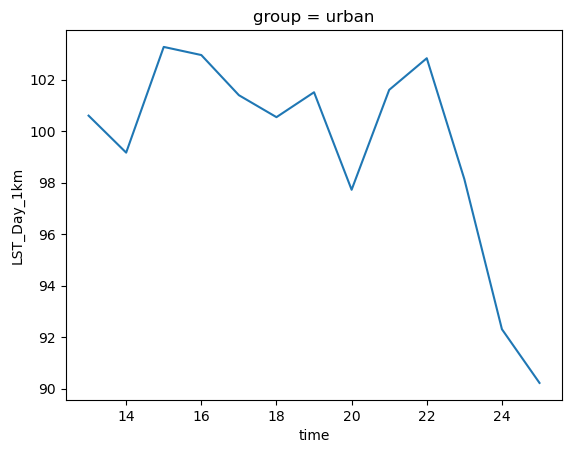

In [89]:
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(label='Urban')


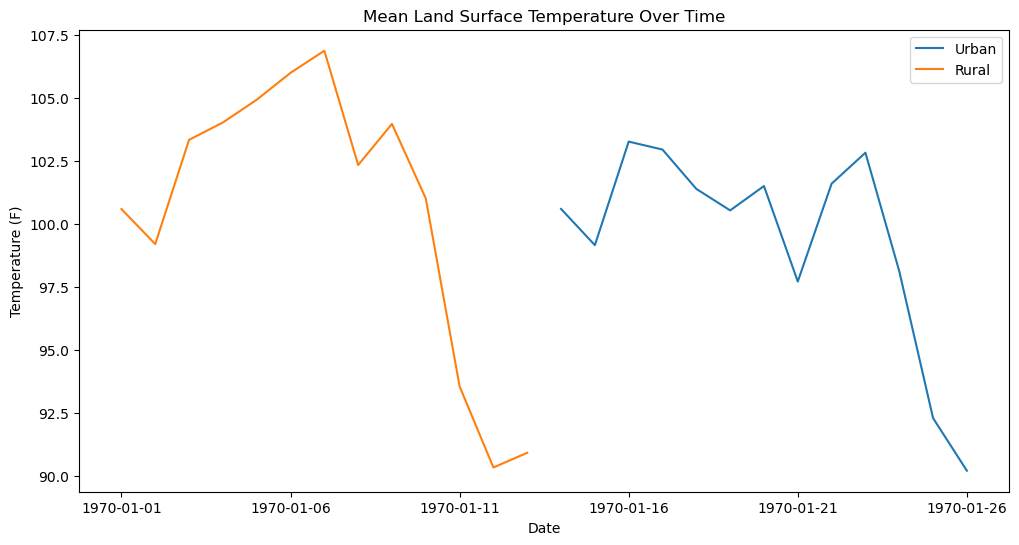

In [90]:
# Plot time series
fig, ax = plt.subplots(figsize=(12, 6))
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Urban')
ds.sel(group='rural')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Rural')

# Formatting the plot
ax.set_title('Mean Land Surface Temperature Over Time')
ax.set_xlabel('Date')
ax.set_ylabel(f'Temperature ({unit})')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend()
plt.show()


### 4. Modeling



**Model Selection:**
- Choose appropriate statistical and machine learning models (e.g., regression analysis, clustering).

**Training and Testing:**
- Split data into training and testing sets.
- Train models to identify key factors contributing to UHI.

**Model Evaluation:**
- Use metrics such as R-squared, Mean Absolute Error (MAE) to evaluate model performance.
- Validate models using cross-validation techniques.



### 5. Evaluation



**Model Performance:**
- Assess the performance of models on test data.
- Refine models based on evaluation metrics and feedback.

**Insights and Interpretation:**
- Interpret the results to identify significant factors influencing UHI.
- Visualize the findings using heatmaps and charts.

**Review Objectives:**
- Ensure the project goals are met.
- Validate findings with domain experts.



### 6. Deployment



**Reporting:**
- Prepare a comprehensive report detailing the findings, methodology, and recommendations.
- Create visualizations and interactive dashboards for stakeholders.

**Actionable Insights:**
- Propose mitigation strategies such as increasing green spaces or implementing reflective materials.
- Suggest policy changes based on data-driven insights.

**Dissemination:**
- Share findings with city planners, environmental agencies, and the public.
- Publish results in relevant journals or online platforms.

**Maintenance and Monitoring:**
- Set up periodic monitoring of UHI using updated data.
- Refine models and strategies based on new data and feedback.



### Timeline and Milestones

1. **Weeks 1-2: Business Understanding**
   - Define objectives, goals, and project plan.

2. **Weeks 3-4: Data Understanding**
   - Collect and explore data, assess quality.

3. **Weeks 5-7: Data Preparation**
   - Clean, transform, and integrate data.

4. **Weeks 8-10: Modeling**
   - Train, test, and evaluate models.

5. **Weeks 11-12: Evaluation**
   - Interpret results, validate with experts.

6. **Weeks 13-14: Deployment**
   - Prepare reports, visualizations, and share findings.

This plan outlines a structured approach to the Urban Heat Island Analysis project, ensuring each phase is thoroughly addressed to achieve the project objectives.